In [12]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

In [14]:
import matplotlib.pyplot as plt

### 참고. 정규분포 관련 함수들

* stat.norm(평균, 표준편차): 평균과 표준편차의 정규분포를 따르는 확률변수 생성
* .pdf(확률변수): 밀도함수 계산
* .cdf(확률변수): 누적분포함수 P (X<=확률변수)
* .isf(alpha): 상위 alpha%가 되는 확률변수값 반환
* .interval(alpha): 확률이 alpha가 되는 가운데 부분의 구간 반환

### 모평균의 구간추정

#### 문제 1
표준정규분포로부터 뽑아 95% 신뢰구간을 구하는 것을 20번 반복했을 떄, 몇 개의 신뢰구간이 모평균을 포함할지 확인

In [15]:
# 성적 데이터

df = pd.read_csv('C:/TIL/Python_data/data/ch4_scores400.csv')
scores = np.array(df['score'])

In [16]:
# 성적데이터 모집단의 평균과 분산 계산

p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

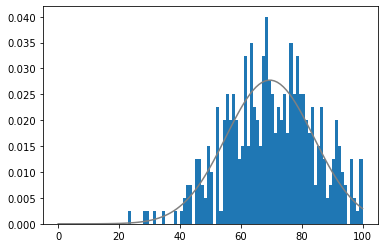

In [18]:
# 모집단의 분포
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
plt.plot(xs, rv.pdf(xs), color='gray')     # 평균 69.53, 분산 206.67 인 정규분포
plt.hist(scores, bins=100, range=(0, 100), density=True)
plt.show()

In [33]:
# sample 데이터 생성
n_sam = 10000
n = 20
samples = np.random.choice(scores, (n_sam, n))
samples[:5]

array([[ 77,  71,  49,  57,  78,  54,  49,  80,  78,  78,  67,  67,  76,
         66,  47,  55,  47,  91,  85,  61],
       [ 96,  66,  80,  78,  68,  72,  83,  96,  85,  62,  73,  62,  74,
         98,  64,  74,  68,  86,  80,  61],
       [ 94,  96,  87,  84, 100,  75,  73,  69,  74,  66,  68,  79,  87,
         83,  67,  72,  71,  67,  64,  80],
       [ 54,  83,  80,  65,  77,  79,  78,  93,  40,  70,  75,  65,  68,
         58,  57,  52,  87,  70,  81,  97],
       [ 78,  56,  67,  43,  90,  67,  72,  61,  69,  59,  54, 100,  54,
         62,  96,  61,  64,  71,  84,  67]], dtype=int64)

In [34]:
rv = stats.norm()
rv.isf(0.025)

1.9599639845400545

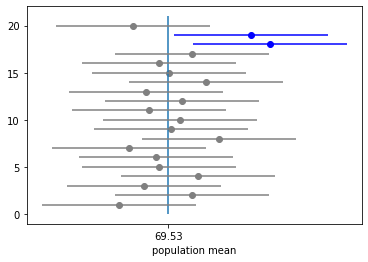

In [38]:
# 모분산을 아는 경우 95% 신뢰구간 : 정규분포를 이용

rv = stats.norm()
n_samples = 20
n = 20

plt.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean + rv.isf(0.025) * np.sqrt(p_var/n)
#     ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/20)

    if lcl <= p_mean <= ucl:
        plt.scatter(s_mean, n_samples-i, color = 'gray')
        plt.hlines(n_samples - i, lcl, ucl, color='gray')
    else:
        plt.scatter(s_mean, n_samples-i, color = 'b')
        plt.hlines(n_samples - i, lcl, ucl, color='b')

plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()

# 난 왜 두개 나와? 강사님은 1갠데..?

In [39]:
# 모분산을 모르는 경우 95% 신뢰구간 : t - 분포 이용
n = 20
alpha = 0.25
sample_ = samples[0]
s_mean = np.mean(sample_)
s_var = np.var(sample_)
rv = stats.t(df=n-1)

lcl = s_mean - rv.isf(alpha) * np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha) * np.sqrt(s_var/n)
lcl, ucl

(64.60886718758785, 68.69113281241216)

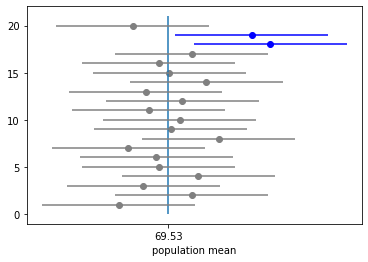

In [42]:
n_samples = 20
n = 20
rv = stats.t(df = n-1)
alpha = 25

plt.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean = np.mean(sample_)
    lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean + rv.isf(0.025) * np.sqrt(p_var/n)
#     ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/20)

    if lcl <= p_mean <= ucl:
        plt.scatter(s_mean, n_samples-i, color = 'gray')
        plt.hlines(n_samples - i, lcl, ucl, color='gray')
    else:
        plt.scatter(s_mean, n_samples-i, color = 'b')
        plt.hlines(n_samples - i, lcl, ucl, color='b')

plt.xticks([p_mean])
plt.xlabel('population mean')
plt.show()

# 여기도 좀 이상한디...

#### 문제2
만 7세 어린이 중 부모의 동의를 얻은 학생 중 10명을 표본으로 추출.
머리 둘레를 측정한 결과를 기준으로 모평균을 95% 신뢰수준에서 신뢰구간을 추정하시오.

In [43]:
# 표본 데이터
data = [520, 498, 481, 512, 515, 542, 520, 518, 527, 526]
s_mean = np.mean(data)
s_var = np.var(data)
n = len(data)
rv = stats.t(df=n-1)
alpha = 0.025

lcl = s_mean - rv.isf(alpha) * np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha) * np.sqrt(s_var/n)
lcl, ucl

(504.59170283295526, 527.2082971670446)

In [45]:
# 정규분포를 이용한 것

rv = stats.norm()
alpha = 0.025
lcl = s_mean - rv.isf(alpha) * np.sqrt(s_var/n)
ucl = s_mean + rv.isf(alpha) * np.sqrt(s_var/n)
lcl, ucl

(506.10233627489055, 525.6976637251095)

## 통계적 가설검정 (test)

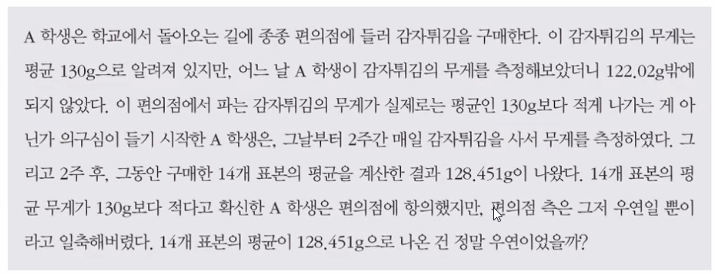

In [46]:
# 감자 무게 측정 데이터

df = pd.read_csv('C:/TIL/Python_data/data/ch11_potato.csv')
sample = np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [47]:
# 표본 평균 확인
s_mean = np.mean(sample)
s_mean

128.4507142857143

In [48]:
# 표본 분산 확인
s_var = np.var(sample)
s_var

14.735449489795883

In [49]:
# 모분산 = 9
rv = stats.norm(130, np.sqrt(9/14))
rv.isf(0.95)

128.68118313069039

In [ ]:
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

In [ ]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')